In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
targets = ['hal_user', 'inh_user', 'meth_user', 'pnr_user', 
                       'trq_user', 'stm_user', 'sed_user', 'cig_user',
                       'alc_user', 'mj_user', 'coc_user', 'crack_user',
                       'her_user']
drugs = ['hallucinogens', 'inhalants', 'methamphetamine', 'pain relievers',
         'tranqualizers', 'stimulants', 'sedatives', 'tobacco', 'alcohol',
         'marijuana', 'cocaine', 'crack', 'heroin']

In [3]:
with_drugs_results = []

for drug, target in zip(drugs, targets):
    train =  pd.read_csv('with_drug_data/' + drug + '_train.csv', header=None)
    test = pd.read_csv('with_drug_data/' + drug + '_test.csv', header=None) 
    train_Ys = pd.read_csv('with_drug_data/' + drug + '_train_y.csv') 
    test_Ys = pd.read_csv('with_drug_data/' + drug + '_test_y.csv') 
    clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000).fit(train, train_Ys[target])
    accuracy = accuracy_score(test_Ys[target], clf.predict(test))
    with_drugs_results.append(accuracy)
with_drugs_results

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[1.0,
 1.0,
 0.9943057996485062,
 0.9597188049209139,
 0.9796133567662566,
 0.9997188049209139,
 0.9951493848857645,
 0.9484710017574692,
 0.9958523725834798,
 0.9970474516695957,
 0.9824253075571178,
 0.9977504393673111,
 0.9945869947275923]

In [5]:
from matplotlib import pyplot as plt

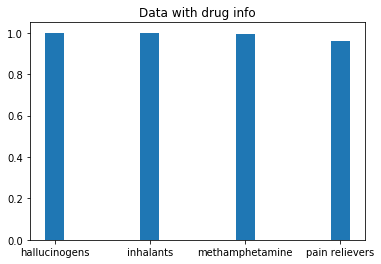

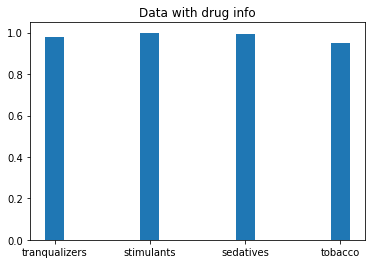

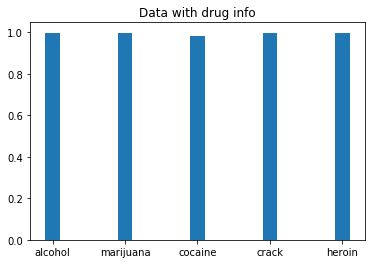

In [15]:
x = np.arange(4)
fig, ax = plt.subplots()
plt.bar(x, with_drugs_results[:4], width=0.2)
plt.xticks(x, drugs[:4])
plt.title("Data with drug info")
plt.show()

x = np.arange(4)
fig, ax = plt.subplots()
plt.bar(x, with_drugs_results[4:8], width=0.2)
plt.xticks(x, drugs[4:8])
plt.title("Data with drug info")
plt.show()

x = np.arange(5)
fig, ax = plt.subplots()
plt.bar(x, with_drugs_results[8:], width=0.2)
plt.xticks(x, drugs[8:])
plt.title("Data with drug info")
plt.show()

As you can see from graphs, accuracies are pretty high, but that does not imply the result of the project is itself good. 

In some cases results are good for real, for example in case of tobacco or alcohol. Info about these drugs was possible to fully eliminate from training dataset because all columns of interest contained prefixes related to tese drugs.

In case of inhalants for example, the only way to eliminate all info about usage of inhalants was to delete columns manually (which is hell a lot of stupid work when you have 2500 columns) because the names of these columns were completely different without any common prefix. Due to this, dataset for inhalants could contain features about inhalants consuming. Factor analysis generated a factor based on these varialbes and it was the best column for prediction, giving good accuracy (like 0.9997 or even 1). But the result for that dataset is almost useless.

In [9]:
without_drugs_results = []

for drug, target in zip(drugs, targets):

    train =  pd.read_csv('without_drug_data/' + drug + '_train.csv', header=None)
    test = pd.read_csv('without_drug_data/' + drug + '_test.csv', header=None) 
    train_Ys = pd.read_csv('without_drug_data/' + drug + '_train_y.csv') 
    test_Ys = pd.read_csv('without_drug_data/' + drug + '_test_y.csv') 

    clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000).fit(train, train_Ys[target])
    accuracy = accuracy_score(test_Ys[target], clf.predict(test))
    without_drugs_results.append(accuracy)
      
without_drugs_results

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[1.0,
 1.0,
 0.9944463971880492,
 0.9617574692442882,
 0.9833391915641476,
 0.9784182776801406,
 0.9953602811950791,
 0.9528998242530756,
 0.9960632688927944,
 0.9978910369068541,
 0.9995782073813708,
 0.9980316344463972,
 0.9958523725834798]

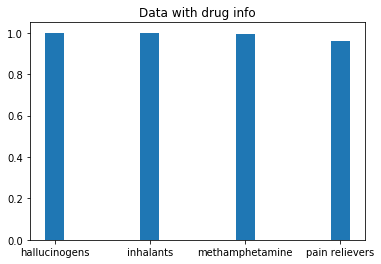

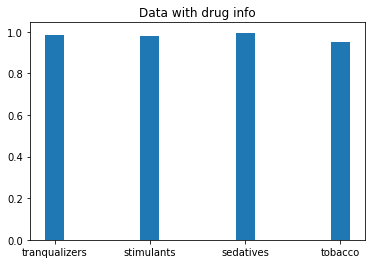

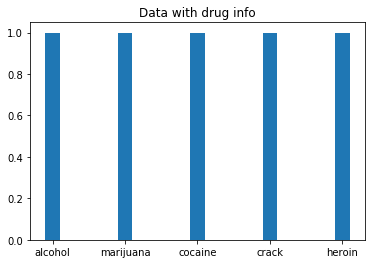

In [10]:
x = np.arange(4)
fig, ax = plt.subplots()
plt.bar(x, without_drugs_results[:4], width=0.2)
plt.xticks(x, drugs[:4])
plt.title("Data with drug info")
plt.show()

x = np.arange(4)
fig, ax = plt.subplots()
plt.bar(x, without_drugs_results[4:8], width=0.2)
plt.xticks(x, drugs[4:8])
plt.title("Data with drug info")
plt.show()

x = np.arange(5)
fig, ax = plt.subplots()
plt.bar(x, without_drugs_results[8:], width=0.2)
plt.xticks(x, drugs[8:])
plt.title("Data with drug info")
plt.show()